# Pair Programming Test Estadísticos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy.stats import kstest
import statsmodels.api as sm


In [2]:
df = pd.read_csv('data/sin_outliers_data.csv', index_col= 0)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.
### 1. ¿Qué diferencia existe el error de tipo I y el error de tipo II?

Por ejemplo:

- Nuestra Hipótesis nula (H0) es que  el Índice de Masa Corporal ('bmi') NO afecta el coste médico 'charges'
- Nuestra Hipótesis alternativa (H1) es que  el Índice de Masa Corporal ('bmi') afecta el coste médico 'charges'


El error de Tipo 1 es cuando rechazamos la Hipótesis Nula siendo verdadera: es decir, si creemos que el índice de Masa Corporal afecta al coste médico, cuando en realidad no existe dicha relación.

El error de Tipo 2 es cuando aceptamos la HO siedo falsa. Es decir, aceptamos que no hay una relación entre el BMI y el coste médico, cuando en realidad sí lo hay.

### 2. ¿Qué es la asimetría? 

La asimetría es la falta de simetría que presenta una distribución teniendo en cuenta la media. Una distribución asimétrica puede tener una curva sesgada hacía la derecha o la izquierda. 


### 3. ¿Es vuestra variable respuesta asimétrica?

In [3]:
df['charges'].skew()

1.178312753138661

Nuestra variable respuesta ('charges') tiene una distribución asimétrica positiva, ya que el valor de skew es mayor de 0. Por tanto, la mediana se encuentra sesgada a la derecha, por debajo de la media.


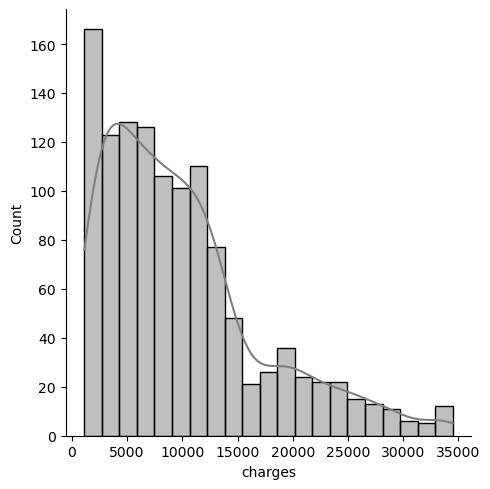

In [4]:

displo1 = sns.displot(df["charges"], kde = True, color = "grey");


Nuestros datos no se acercan a una campana de Gauss, nuestra variable respuesta es asimétrica y no tiene una distribución normal.

### 4. ¿Qué tipo de curtosis presenta vuestra variable respuesta?

In [5]:
kurtosistest(df['charges'])

KurtosistestResult(statistic=5.029430687634005, pvalue=4.919382876821623e-07)


Nuestra variable respuesta tiene una curtosis de tipo platicútica, es decir, tiene una morfología aplanada.


### 5. ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

In [6]:
kstest(df["charges"], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

Nuestro *p-valor* < 0.05, podemos rechazar la H0 por lo que los datos son no normales.

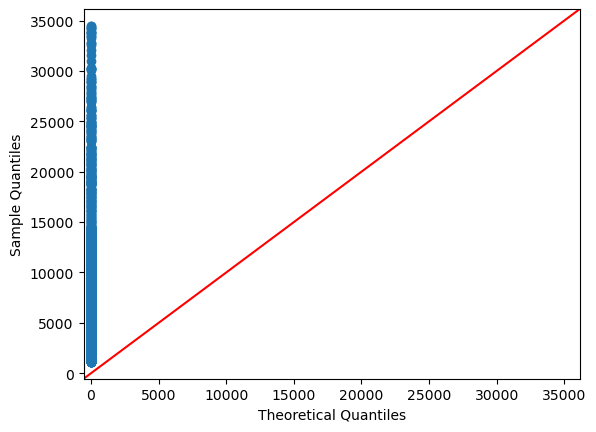

In [7]:
sm.qqplot(df['charges'], line ='45')

Los datos no se aproximan nada a la línea roja, lo que nos indica que los datos no son normales. 